Name: Jordan Pinkava

Course: BMGT404

Section: 0201

Date: 03/13/2024

# Order Fulfillment Analysis

Terpazon.com is one of the best ecommerce websites for B2B and B2C transactions. At terpazon.com, my current objective is to maximize the company's profits. In order to maximize Terpazon.com's profits, I am going to parse through the data from the past three month to see what we are doing well and what we need to work on to reach our goals. 

# Initial Data Load

In order to better understand our data, we want to use the pandas, numpy, and matplotlib libraries, all of which will help us better visualizes and parse through our data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The first step to analyzing data is getting familiar with the data we are working with. Below, I load in the terpzon.com warehouse data from the past three months. Doing this using pandas allows me to easily view the data in a table-like format, which will be helpful for our analyses going forward.

In [2]:
#1
#load in the data using pd.read_csv using the order ID as the index for our data.
terpazon_df = pd.read_csv('HW3-order-fulfillment (1).csv', index_col='Order ID')
terpazon_df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
Order ID,,,,,,,,,,,,,
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
2,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
3,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
5,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


I am curious to know just how many orders have been placed in the past three months. Two ways I can check this is by using .count() and .tail(). With .count(), it tells me how much data is in each column of the dataset. .tail() tells us the last 5 rows, which also tells me the order ID (aka our index), which ives insights to how many orders have been placed. By using both, I can cross compare and confirm that 9,994 orders have been placed over the past 3 months at terpazon.com.

In [3]:
#2
#len tells us the length of the dataset, which tells us the amount of orders that have been placed
print(f"The amount of orders loaded is {len(terpazon_df)}")

The amount of orders loaded is 9994


We are interested to see some of our highest profitting orders from the past 3 months, too. Below, I loaded in the top 20 orders that yielded the highest profit and all of the associated data with it. Now we can see what orders did best in terms of profit and start to see why that is.

In [4]:
#3
#use sort_values method to sort by the Profit column and in Descending order (so we get the highest profits). Then, we use .head() to show the top 20.
terpazon_df.sort_values(by="Profit", ascending=False).head(20)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
Order ID,,,,,,,,,,,,,
6827,Standard Class,Corporate,United States,Lafayette,Indiana,47905,Central,Technology,Copiers,17499.950,5,0.0,8399.9760
8154,First Class,Consumer,United States,Seattle,Washington,98115,West,Technology,Copiers,13999.960,4,0.0,6719.9808
4191,Standard Class,Consumer,United States,Newark,Delaware,19711,East,Technology,Copiers,10499.970,3,0.0,5039.9856
9040,Standard Class,Consumer,United States,Detroit,Michigan,48205,Central,Office Supplies,Binders,9892.740,13,0.0,4946.3700
4099,Standard Class,Consumer,United States,Minneapolis,Minnesota,55407,Central,Office Supplies,Binders,9449.950,5,0.0,4630.4755
2624,First Class,Home Office,United States,New York City,New York,10024,East,Technology,Copiers,11199.968,4,0.2,3919.9888
510,Standard Class,Consumer,United States,Atlanta,Georgia,30318,South,Office Supplies,Binders,6354.950,5,0.0,3177.4750
8489,Second Class,Consumer,United States,Arlington,Virginia,22204,South,Technology,Machines,8749.950,5,0.0,2799.9840
7667,Standard Class,Home Office,United States,Providence,Rhode Island,2908,East,Technology,Copiers,5399.910,9,0.0,2591.9568


# Data Augmentation and Filtration

A column indicating whether or not the order was profittable or at a loss could be interesting to us. Since we put our losses as a negative value in the profit column, I decided that a column displaying whether it was a profit or loss in a boolean context would be best to clarify how the order did. If I were to create a table that only had losses, there would be a lot of missing values (for the profittable orders), so I decided it would be easier for me to work with the data if profit is stated as True or False in our new column, whereas profit is False in the Profit (or loss) category since we are checking for loss (loss would be denoted as True).

In [7]:
#4
#I created a mask that defined a loss as any value in the profit column that is less than 0
loss = terpazon_df["Profit"] < 0
#using our new variable, I created a new column called "Profit (or loss)" and set it equal to our mask, loss
terpazon_df["Profit (or loss)"] = loss

#below, sort the losses to show the top 10 highest losses
losses = terpazon_df.sort_values(by = "Profit")
losses.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit (or loss)
Order ID,,,,,,,,,,,,,,
7773,Standard Class,Consumer,United States,Lancaster,Ohio,43130,East,Technology,Machines,4499.985,5,0.7,-6599.9780,True
684,Same Day,Corporate,United States,Burlington,North Carolina,27217,South,Technology,Machines,7999.980,4,0.5,-3839.9904,True
9775,Standard Class,Consumer,United States,San Antonio,Texas,78207,Central,Office Supplies,Binders,2177.584,8,0.8,-3701.8928,True
3012,Standard Class,Home Office,United States,Louisville,Colorado,80027,West,Technology,Machines,2549.985,5,0.7,-3399.9800,True
4992,Standard Class,Corporate,United States,Chicago,Illinois,60653,Central,Office Supplies,Binders,1889.990,5,0.8,-2929.4845,True
3152,First Class,Consumer,United States,Newark,Ohio,43055,East,Technology,Machines,1799.994,2,0.7,-2639.9912,True
5311,First Class,Consumer,United States,Houston,Texas,77095,Central,Office Supplies,Binders,1525.188,6,0.8,-2287.7820,True
9640,Second Class,Consumer,United States,Concord,North Carolina,28027,South,Furniture,Tables,4297.644,13,0.4,-1862.3124,True
1200,Standard Class,Consumer,United States,Houston,Texas,77041,Central,Office Supplies,Binders,1088.792,4,0.8,-1850.9464,True


I want to be able to easily locate data based on the columns, the values within, and get them sorted by highest profit. To make future searches easier on myself, I created a function that looks through a given dataframe, returns the top n rows of data according to the column and value you are interested in. When a column and value is not specified, it returns the sorted dataframe as a whole. 

In [9]:
#5
#create the function and define our parameters: dataframe, column, value, n (number of rows to print)
def data_search(dataframe, column = None, value = None, n=15):
    #I started with a conditional to see whether or not a column and value was given
    if column != None and value != None:
        #this locates the column and value of interest, on the df which is sorted by profit
        df = dataframe.loc[dataframe[column]==value].sort_values(by="Profit", ascending = False, axis = 0)
        #returns the amount of rows specified, 15 if not specified
        return df.head(n)
    else:
        #simply returns the dataframe sorted by profit
        df2 = dataframe.sort_values(by="Profit", axis = 0, ascending = False)
        #returns the amount of rows specified, 15 if not specified
        return df2.head(n)

The following 4 cells are different searches that can happen using our function. 

1. The top 7 orders in the dataset

2. The top 10 orders in the state of Maryland

3. The top twenty orders shippied to consumers

4. Top 5 orders shipped to zipcode 20852

In all the following, I am simplying calling data_search() with the parameters of interest.

In [10]:
#6a
print("The top 7 orders:")
data_search(terpazon_df, n = 7)

The top 7 orders:


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit (or loss)
Order ID,,,,,,,,,,,,,,
6827,Standard Class,Corporate,United States,Lafayette,Indiana,47905,Central,Technology,Copiers,17499.950,5,0.0,8399.9760,False
8154,First Class,Consumer,United States,Seattle,Washington,98115,West,Technology,Copiers,13999.960,4,0.0,6719.9808,False
4191,Standard Class,Consumer,United States,Newark,Delaware,19711,East,Technology,Copiers,10499.970,3,0.0,5039.9856,False
9040,Standard Class,Consumer,United States,Detroit,Michigan,48205,Central,Office Supplies,Binders,9892.740,13,0.0,4946.3700,False
4099,Standard Class,Consumer,United States,Minneapolis,Minnesota,55407,Central,Office Supplies,Binders,9449.950,5,0.0,4630.4755,False
2624,First Class,Home Office,United States,New York City,New York,10024,East,Technology,Copiers,11199.968,4,0.2,3919.9888,False
510,Standard Class,Consumer,United States,Atlanta,Georgia,30318,South,Office Supplies,Binders,6354.950,5,0.0,3177.4750,False


In [12]:
#6b
print("Top 10 orders in Maryland")
data_search(terpazon_df, column = "State", value= 'Maryland', n = 7)

Top 10 orders in Maryland


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit (or loss)
Order ID,,,,,,,,,,,,,,
7281,Standard Class,Consumer,United States,Columbia,Maryland,21044,East,Office Supplies,Binders,2541.98,2,0.0,1270.9900,False
3184,Second Class,Corporate,United States,Columbia,Maryland,21044,East,Office Supplies,Storage,1633.14,9,0.0,473.6106,False
7766,Same Day,Corporate,United States,Columbia,Maryland,21044,East,Furniture,Chairs,1779.90,5,0.0,373.7790,False
3183,Second Class,Corporate,United States,Columbia,Maryland,21044,East,Technology,Accessories,826.62,3,0.0,355.4466,False
3733,Standard Class,Corporate,United States,Clinton,Maryland,20735,East,Technology,Phones,1259.93,7,0.0,327.5818,False
4401,Same Day,Consumer,United States,Columbia,Maryland,21044,East,Office Supplies,Appliances,901.95,3,0.0,297.6435,False
4247,Standard Class,Home Office,United States,Baltimore,Maryland,21215,East,Furniture,Furnishings,1049.20,5,0.0,272.7920,False


In [13]:
#6c
print("The top twenty orders shippied to consumers")
data_search(terpazon_df, column = 'Segment', value = 'Consumer', n = 20)

The top twenty orders shippied to consumers


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit (or loss)
Order ID,,,,,,,,,,,,,,
8154,First Class,Consumer,United States,Seattle,Washington,98115,West,Technology,Copiers,13999.960,4,0.0,6719.9808,False
4191,Standard Class,Consumer,United States,Newark,Delaware,19711,East,Technology,Copiers,10499.970,3,0.0,5039.9856,False
9040,Standard Class,Consumer,United States,Detroit,Michigan,48205,Central,Office Supplies,Binders,9892.740,13,0.0,4946.3700,False
4099,Standard Class,Consumer,United States,Minneapolis,Minnesota,55407,Central,Office Supplies,Binders,9449.950,5,0.0,4630.4755,False
510,Standard Class,Consumer,United States,Atlanta,Georgia,30318,South,Office Supplies,Binders,6354.950,5,0.0,3177.4750,False
8489,Second Class,Consumer,United States,Arlington,Virginia,22204,South,Technology,Machines,8749.950,5,0.0,2799.9840,False
6521,Second Class,Consumer,United States,Jackson,Michigan,49201,Central,Office Supplies,Binders,5443.960,4,0.0,2504.2216,False
1086,Standard Class,Consumer,United States,Yonkers,New York,10701,East,Technology,Machines,4899.930,7,0.0,2400.9657,False
6627,Standard Class,Consumer,United States,New York City,New York,10024,East,Technology,Machines,6999.960,4,0.0,2239.9872,False


In [24]:
#6d dont know why this one isnt working
print("Top 5 orders shipped to zipcode 20852")
data_search(terpazon_df, column = 'Postal Code', value = 20852, n = 5)

Top 5 orders shipped to zipcode 20852


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit (or loss)
Order ID,,,,,,,,,,,,,,
1178,Standard Class,Consumer,United States,Rockville,Maryland,20852,East,Furniture,Chairs,172.50,2,0.0,51.7500,False
1179,Standard Class,Consumer,United States,Rockville,Maryland,20852,East,Technology,Phones,179.97,3,0.0,44.9925,False
9068,Standard Class,Consumer,United States,Rockville,Maryland,20852,East,Technology,Phones,90.48,2,0.0,23.5248,False
8189,Second Class,Consumer,United States,Rockville,Maryland,20852,East,Office Supplies,Paper,19.44,3,0.0,9.3312,False
8190,Second Class,Consumer,United States,Rockville,Maryland,20852,East,Office Supplies,Binders,7.38,1,0.0,3.6162,False


# Data Analysis

When analyzing data for terpazon.com, we are particularly curious about our profits and losses and the descriptive statistics of that variable. I want to know what our data looks like in terms of stats, and below we do just that. Descriptive statistics are highly significant to my analysis of terpazon.com

In [15]:
#7 
#use descriptive statistics methods including .median(), .min(), .max(), and .mean()
print(f"Highest Loss: {terpazon_df['Profit'].min():.2f}")
print(f"Highest Profit: {terpazon_df['Profit'].max():.2f}")
print(f"Average Profit: {terpazon_df['Profit'].mean():.2f}")
print(f"Median Profit: {terpazon_df['Profit'].median():.2f}")

Highest Loss: -6599.98
Highest Profit: 8399.98
Average Profit: 28.66
Median Profit: 8.67


We want to know how many of our orders were profittable, and we are also highly interested on if over 85% of our orders were profittable. Below, I will see the percentage of profittable orders.

In [26]:
#8 
#create a mask that finds only profittable orders, and sums those orders (so we have the amount of orders that are profittable)
mask = (terpazon_df["Profit"] > 0).sum()
#get the length of the dataset for our denomonator
dataframe_length = len(terpazon_df)
#get the percentage of profittable orders in our dataset
perc = (mask/dataframe_length)*100
print(f"The percentage of orders that were profitable is {perc:.2f}%")

The percentage of orders that were profitable is 80.63%


Based on the data above, we did not reach our goal of 85% profittability for our orders. Because of this, I am going to strategize with our team on working on profittability from here on out. It is incredibly important for terpazon.com to reach this profittability goal so that we can grow and thrive in the coming years.

Within our data, we have sub categories for the items that we are selling. We are curious on which categories sell the most, which is our most purchased items. Below, I find the top three most purchased items in our store. 

In [17]:
#9 
#get the value counts for the different items in "Sub-Category"
top_cats= terpazon_df["Sub-Category"].value_counts()
#get the top 3 counts of the value counts for the different items
top_cats.head(3)

Binders        1523
Paper          1370
Furnishings     957
Name: Sub-Category, dtype: int64

We want to see the percentage of these items within our dataset. It is helpful to see what percentage of these items are actually being bought. The higher the percentage tells us more about how popular these items are in our store, which may mean we want to increase production on these products!

In [29]:
#9
#I simply filter for the top product, then divide by the length of our dataset for each item
binders = (top_cats["Binders"]/dataframe_length)*100
print(f"Percentage of binders ordered: {round(binders, 2)}%")
paper = (top_cats["Paper"]/dataframe_length)*100
print(f"Percentage of paper ordered: {round(paper, 2)}%")
furnishings = (top_cats["Furnishings"]/dataframe_length)*100
print(f"Percentage of furnishings ordered: {round(furnishings, 2)}%")

Percentage of binders ordered: 15.24%
Percentage of paper ordered: 13.71%
Percentage of furnishings ordered: 9.58%


Finally, we want to see the overall percentage of our top three items in comparison to the rest of our items. Since we calculated each percentage above, we simply can add up all of our percentages to get the total percentage of these top items compared to the rest of our items

In [31]:
#10 
#combine the percentages across our top three items
total = binders + paper + furnishings
print(f"Total: {round(total, 2)}%")

Total: 38.52%


We want to build warehouses going forward, and it makes the most sense to do this in places where we have the most orders and make the most profit. In the analysis below, you will see that I look for the amount of orders in a given region, then look at the top most profitable orders to see which region those fall into.

In [20]:
#11 
#find the counts of orders within each region
regions = terpazon_df["Region"].value_counts()
print(regions.head())
#locate and sort the values by profit to see which regions were among the top most profittable orders
print(terpazon_df.loc[:, ["Region", "Profit"]].sort_values(by="Profit", ascending = False).head(10))

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64
           Region     Profit
Order ID                    
6827      Central  8399.9760
8154         West  6719.9808
4191         East  5039.9856
9040      Central  4946.3700
4099      Central  4630.4755
2624         East  3919.9888
510         South  3177.4750
8489        South  2799.9840
7667         East  2591.9568
6521      Central  2504.2216


Based on the outputs above, we see that the west has the most orders, but among the top ten most profittable orders, we have 4/10 from the central region. Based on those two factors, I think putting warehouses in the central region is the best move. Central region only has the 3rd most amount of orders, so we should add to that region since it is providing us with so many profittable orders.

# Data Visualization

Finally, visualizing data is extremely important for understanding our data at terpazon.com. I personally want to visualize the top ten states that get the most orders, and viewing that in a barchart will help me compare our top ten states order amounts. 

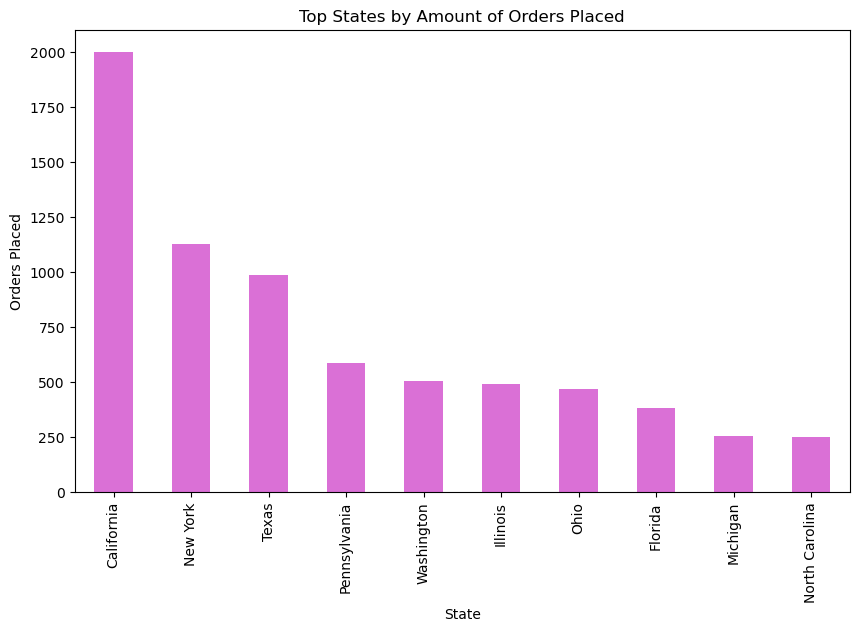

In [21]:
#12 
#get the counts for each state
state_counts = terpazon_df["State"].value_counts()
#seperate the top ten states from those counts
topstates = state_counts.head(10)
#make a plot using the top ten states data and put in in a bar chart, as displayed below
topstates.plot(kind='bar', y='Category', figsize=(10, 6), color = 'Orchid');
plt.title('Top States by Amount of Orders Placed')
plt.xlabel('State')
plt.ylabel('Orders Placed')
plt.show()

Based on the bar chart created above, we see that California, New York, and Texas get the most orders in our dataset. This makes a lot of sense as these three states are three of the most populated states in the US. Further, these states have some of the most significant and populus cities in the country, include Los Angeles, San Francisco, New York City, Houston, and Dallas. Because of the populations of both the states and their major cities, it is understandable that much of our orders are placed in those states. From the bar chart, we also see how large the bar for California is compared the the rest, and New York and Texas are also quite sizable compared to the rest as well. Through this, we can infer that we get a large number of orders from these 3 states because of their large populations in the US. 

"I pledge on my honor that I have not given nor received any unauthorized
assistance on this assignment."
--Jordan Pinkava